In [4]:
import pandas as pd
df_all = pd.read_csv("joint_behavior.csv")

In [7]:
joint_behavior = df_all.drop(columns='Unnamed: 0').iloc[:,:-2]

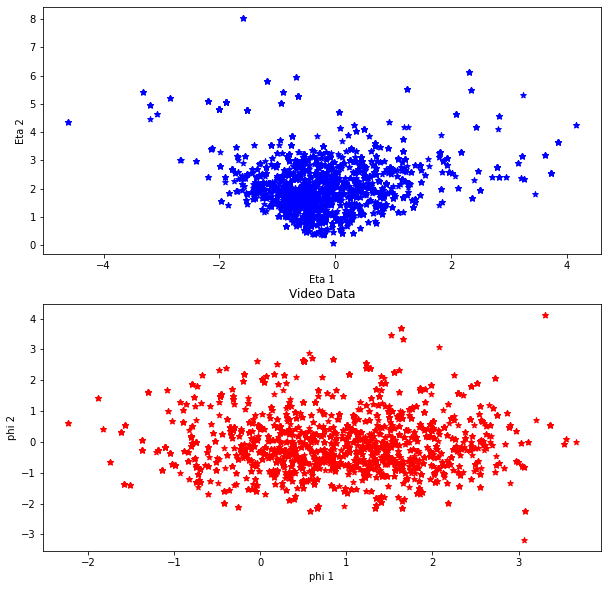

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Covariance matrix
s = joint_behavior.cov()

# Submatrices
sa = s.iloc[0:2, 0:2]
sb = s.iloc[2:6, 2:6]

# Eigen decomposition
eiga = np.linalg.eig(sa)
eigb = np.linalg.eig(sb)

# Scaling matrices
sa2 = eiga[1] @ np.diag(1/np.sqrt(eiga[0])) @ eiga[1].T
sb2 = eigb[1] @ np.diag(1/np.sqrt(eigb[0])) @ eigb[1].T

# Compute k
k = sa2 @ s.iloc[0:2, 2:6] @ sb2

# Singular Value Decomposition
si = np.linalg.svd(k)

# Compute a and b
a = sa2 @ si[0]
b = sb2 @ si[2].T

# Projections
eta = joint_behavior.iloc[:, 0:2].to_numpy() @ a[:, 0]
phi = joint_behavior.iloc[:, 2:6].to_numpy() @ b[:, 0]
eta2 = joint_behavior.iloc[:, 0:2].to_numpy() @ a[:, 1]
phi2 = joint_behavior.iloc[:, 2:6].to_numpy() @ b[:, 1]
etaphi = np.column_stack((eta, phi))

# Plot

plt.figure(figsize=(10, 10))
plt.subplot(2,1,1)
plt.scatter(eta,eta2,marker = '*',c='blue')
#plt.scatter(etaphi[:, 0], etaphi[:, 1], marker='*',c ='blue')
#for i, txt in enumerate(car.index):
#    plt.annotate(txt, (etaphi[i, 0], etaphi[i, 1]))
plt.xlabel("Eta 1")
plt.ylabel("Eta 2")
#plt.ylabel("Phi 1")
plt.subplot(2,1,2)
plt.scatter(phi,phi2,marker = '*',c='red')
#plt.scatter(etaphi[:, 0], etaphi[:, 1], marker='*',c ='blue')
#for i, txt in enumerate(car.index):
#    plt.annotate(txt, (etaphi[i, 0], etaphi[i, 1]))
plt.xlabel("phi 1")
plt.ylabel("phi 2")
plt.title("Video Data")
plt.show()


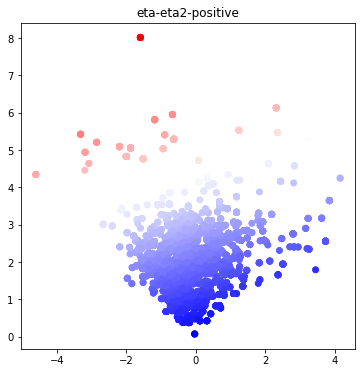

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# 假设我们有以下点的坐标和对应的positive值
plt.figure(figsize=(6,6))
positives = np.array(list(df_all['comsumer_positive']))
plt.title("eta-eta2-positive")

plt.scatter(eta,eta2, c = positives, cmap = 'bwr')

plt.savefig("eta-posi.png",transparent = True)



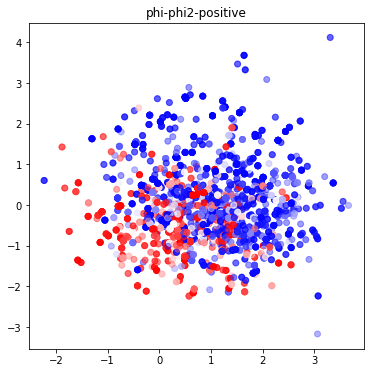

In [11]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(6,6))
# 假设我们有以下点的坐标和对应的positive值

positives = np.array(list(df_all['seller_positive']))
plt.title("phi-phi2-positive")
plt.scatter(phi,phi2, c = positives, cmap = 'bwr', alpha = 0.4)
plt.savefig("phi-posi.png",transparent = True)
#plt.colorbar()


In [12]:
# Example data
data = list(df_all['comsumer_positive'])  # Replace with your list of numbers

# Calculate the indices for the 2nd and 98th percentiles
n = len(data)
index_2 = int(np.ceil(0.01 * n)) - 1
index_98 = int(np.ceil(0.99 * n)) - 1

# Find the 2nd and 98th percentile values
p2_value = np.partition(data, index_2)[index_2]
p98_value = np.partition(data, index_98)[index_98]

# Replace values in the original list
for i in range(n):
    if data[i] < p2_value:
        data[i] = p2_value
    elif data[i] > p98_value:
        data[i] = p98_value

print(data)


[232.0, 191.0, 151.0, 151.0, 151.0, 197.0, 246.0, 246.0, 307.0, 307.0, 307.0, 307.0, 307.0, 93.0, 93.0, 139.0, 139.0, 162.0, 139.0, 46.0, 46.0, 46.0, 126.0, 233.0, 233.0, 233.0, 115.0, 115.0, 115.0, 246.0, 246.0, 246.0, 113.0, 113.0, 243.0, 243.0, 176.0, 176.0, 176.0, 176.0, 239.0, 239.0, 101.0, 101.0, 189.0, 189.0, 189.0, 211.0, 183.0, 183.0, 189.0, 189.0, 189.0, 132.0, 132.0, 140.0, 140.0, 127.0, 214.0, 127.0, 127.0, 338.0, 202.0, 202.0, 175.5, 125.0, 175.5, 175.5, 125.0, 146.0, 146.0, 146.0, 167.0, 167.0, 220.0, 220.0, 293.0, 293.0, 293.0, 237.0, 237.0, 237.0, 237.0, 254.0, 254.0, 188.0, 188.0, 156.0, 156.0, 156.0, 156.0, 179.0, 179.0, 179.0, 179.0, 299.0, 299.0, 237.0, 237.0, 120.0, 120.0, 120.0, 180.0, 180.0, 218.0, 191.0, 307.0, 307.0, 48.0, 48.0, 48.0, 206.0, 241.0, 206.0, 206.0, 311.0, 260.0, 126.0, 126.0, 126.0, 228.0, 220.0, 238.0, 238.0, 220.0, 220.0, 269.0, 269.0, 269.0, 138.0, 184.0, 184.0, 218.0, 218.0, 218.0, 218.0, 248.0, 248.0, 248.0, 103.0, 103.0, 103.0, 130.0, 130.0,

In [13]:
# Example data
data_s = list(df_all['seller_positive'])  # Replace with your list of numbers

# Calculate the indices for the 2nd and 98th percentiles
n = len(data_s)
index_2 = int(np.ceil(0.01 * n)) - 1
index_98 = int(np.ceil(0.99 * n)) - 1

# Find the 2nd and 98th percentile values
p2_value = np.partition(data_s, index_2)[index_2]
p98_value = np.partition(data_s, index_98)[index_98]

# Replace values in the original list
for i in range(n):
    if data_s[i] < p2_value:
        data_s[i] = p2_value
    elif data_s[i] > p98_value:
        data_s[i] = p98_value

print(data_s)

[0.39, 0.08, 0.82, 0.82, 0.82, 0.32, 0.05, 0.05, 0.98, 0.98, 0.98, 0.98, 0.98, 0.03, 0.03, 0.02, 0.02, 0.02, 0.02, 0.31, 0.31, 0.31, 0.55, 0.97, 0.97, 0.97, 0.81, 0.81, 0.81, 0.28, 0.28, 0.28, 0.8, 0.8, 0.12, 0.12, 0.02, 0.02, 0.02, 0.02, 0.64, 0.64, 0.0, 0.0, 0.02, 0.02, 0.02, 0.99, 0.03, 0.03, 0.01, 0.01, 0.01, 0.02, 0.02, 0.89, 0.89, 0.98, 0.02, 0.98, 0.98, 0.02, 0.02, 0.02, 0.395, 0.78, 0.395, 0.395, 0.78, 0.38, 0.38, 0.38, 0.0, 0.0, 0.18, 0.18, 0.02, 0.02, 0.02, 0.01, 0.01, 0.01, 0.01, 0.05, 0.05, 0.43, 0.43, 0.01, 0.01, 0.01, 0.01, 0.94, 0.94, 0.94, 0.94, 0.27, 0.27, 0.97, 0.97, 0.08, 0.08, 0.08, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.89, 0.89, 0.89, 0.07, 0.04, 0.07, 0.07, 0.02, 0.01, 0.98, 0.98, 0.98, 0.01, 0.16, 0.0, 0.0, 0.16, 0.16, 0.11, 0.11, 0.11, 0.2, 0.02, 0.02, 0.18, 0.18, 0.18, 0.18, 0.07, 0.07, 0.07, 0.03, 0.03, 0.03, 0.01, 0.01, 0.01, 0.01, 0.16, 0.03, 0.03, 0.03, 0.07, 0.07, 0.07, 0.03, 0.2, 0.2, 0.01, 0.01, 0.01, 0.01, 0.87, 0.87, 0.87, 0.87, 0.87, 0.01, 0.01, 0.01,

In [18]:
import numpy as np

# Example array with NaNs
array = eta  # Replace with your NumPy array

# Calculate the mean of non-NaN values
mean_value = np.nanmean(array)

# Replace NaNs with the mean value
array[np.isnan(array)] = mean_value

eta = array

In [19]:
import numpy as np

# Example array with NaNs
array = eta2  # Replace with your NumPy array

# Calculate the mean of non-NaN values
mean_value = np.nanmean(array)

# Replace NaNs with the mean value
array[np.isnan(array)] = mean_value

eta2 = array

In [14]:
import numpy as np

# Example array with NaNs
array = phi  # Replace with your NumPy array

# Calculate the mean of non-NaN values
mean_value = np.nanmean(array)

# Replace NaNs with the mean value
array[np.isnan(array)] = mean_value

phi = array

In [17]:
import numpy as np

# Example array with NaNs
array = phi2  # Replace with your NumPy array

# Calculate the mean of non-NaN values
mean_value = np.nanmean(array)

# Replace NaNs with the mean value
array[np.isnan(array)] = mean_value

phi2 = array

In [15]:
import numpy as np

# Example array with NaNs
array = np.array(data)  # Replace with your NumPy array

# Calculate the mean of non-NaN values
mean_value = np.nanmean(array)

# Replace NaNs with the mean value
array[np.isnan(array)] = mean_value

data = array

In [16]:
import numpy as np

# Example array with NaNs
array = np.array(data_s)  # Replace with your NumPy array

# Calculate the mean of non-NaN values
mean_value = np.nanmean(array)

# Replace NaNs with the mean value
array[np.isnan(array)] = mean_value

data_s = array

In [20]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Example data
x = np.array(eta).reshape(-1, 1)  # Replace with your x data and reshape
y = np.array(data)  # Replace with your y data

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(x, y)

# Get the slope (coefficient) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Output results
print("Slope (Coefficient):", slope)
print("Intercept:", intercept)

Slope (Coefficient): -26.53716824263892
Intercept: 204.34158496566064


In [21]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Example data
x = np.array(phi).reshape(-1, 1)  # Replace with your x data and reshape
y = np.array(data_s)  # Replace with your y data

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(x, y)

# Get the slope (coefficient) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Output results
print("Slope (Coefficient):", slope)
print("Intercept:", intercept)

Slope (Coefficient): -0.1398602703687659
Intercept: 0.4668976725538545


In [22]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Example data
x = np.array(eta2).reshape(-1, 1)  # Replace with your x data and reshape
y = np.array(data)  # Replace with your y data

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(x, y)

# Get the slope (coefficient) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Output results
print("Slope (Coefficient):", slope)
print("Intercept:", intercept)

Slope (Coefficient): 91.25153073776741
Intercept: 9.024862110933583


In [23]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Example data
x = np.array(phi2).reshape(-1, 1)  # Replace with your x data and reshape
y = np.array(data_s)  # Replace with your y data

# Create a linear regression model
model = LinearRegression()

# Fit the model
model.fit(x, y)

# Get the slope (coefficient) and intercept
slope = model.coef_[0]
intercept = model.intercept_

# Output results
print("Slope (Coefficient):", slope)
print("Intercept:", intercept)


Slope (Coefficient): -0.1415387113192198
Intercept: 0.3411949498001518


In [24]:
#x2 = (a1 * x1 + (b1 - b2)) / a2
a1 = -26.537168242638874
b1 = 204.34158496566067
a2 = 91.25153073776741
b2 = 9.024862110933583
new_a = a1/a2
new_b = (b1-b2)/a2

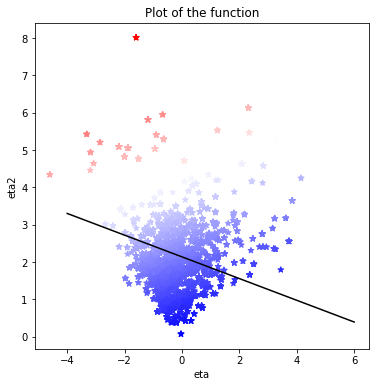

In [26]:
plt.figure(figsize=(6,6))
positives = np.array(list(df_all['comsumer_positive']))
plt.scatter(eta,eta2,marker='*',c = positives , cmap='bwr')


# Define the function
def f(x):
    return new_a * x + new_b

# Generate x values
x_s = np.linspace(-4, 6, 10)  # Adjust range and number of points as needed

# Compute y values
y_s = f(x_s)

# Plotting
plt.plot(x_s, y_s, color = 'black')
plt.xlabel('eta')
plt.ylabel('eta2')
plt.title('Plot of the function')
plt.savefig("new_eta12_posi_emo.png",transparent = True)


In [27]:
import numpy as np

def transform_points(points, new_a, new_b):
    """
    Transform the points to a new coordinate system where the line y = new_a * x + new_b is the new x-axis.

    :param points: List of tuples representing the points (x, y).
    :param new_a: Slope of the line.
    :param new_b: y-intercept of the line.
    :return: List of tuples representing the transformed points.
    """
    transformed_points = []

    # Calculate the angle of rotation
    theta = np.arctan(new_a)

    # Rotation matrix
    rotation_matrix = np.array([
        [np.cos(theta), np.sin(theta)],
        [-np.sin(theta), np.cos(theta)]
    ])

    for x, y in points:
        # Translate the point along the line to y=0
        y_translated = y - new_b

        # Rotate the point
        point_rotated = np.dot(rotation_matrix, np.array([x, y_translated]))

        transformed_points.append((point_rotated[0], point_rotated[1]))

    return transformed_points



In [28]:
points = []
for i in range(len(x)):
    points.append((x[i],y[i]))

In [29]:
points_s = []
for i in range(len(x_s)):
    points_s.append((x_s[i],y_s[i]))

In [30]:
points_eta = []
for i in range(len(eta)):
    points_eta.append((eta[i],eta2[i]))

In [31]:
transform_x = transform_points(points_s,new_a,new_b)
transform_eta  = transform_points(points_eta,new_a,new_b)

In [32]:
x_tran = [item[0] for item in transform_x]
y_tran = [item[1] for item in transform_x]

eta_transformed = [item[0] for item in transform_eta]
eta2_transformed = [item[1] for item in transform_eta]

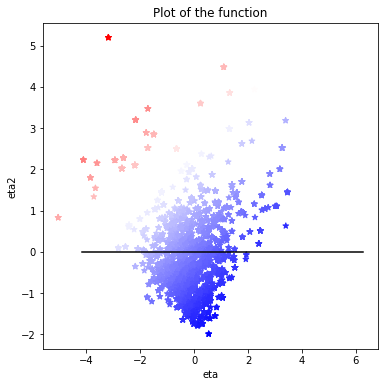

In [34]:
plt.figure(figsize=(6,6))
positives = np.array(list(df_all['comsumer_positive']))
plt.scatter(eta_transformed,eta2_transformed,marker='*',c = positives ,cmap = 'bwr')


# Plotting
plt.plot(x_tran, y_tran, color = 'black')
plt.xlabel('eta')
plt.ylabel('eta2')
plt.title('Plot of the function')
plt.savefig("new_adj_eta_emo.png",transparent = True)

In [35]:
#x2 = (a1 * x1 + (b1 - b2)) / a2
a1 = -0.1398602703687659
b1 = 0.46689767255385456
a2 = -0.1415387113192198
b2 = 0.34119494980015186
new_a = a1/a2
new_b = (b1-b2)/a2

In [44]:
points_s = []
for i in range(len(x_s)):
    points_s.append((x_s[i],y_s[i]))

In [45]:
points_phi = []
for i in range(len(phi)):
    points_phi.append((phi[i],phi2[i]))

In [46]:
transform_x_s = transform_points(points_s,new_a,new_b)
transform_phi  = transform_points(points_phi,new_a,new_b)

In [47]:
x_s_tran = [item[0] for item in transform_x_s]
y_s_tran = [item[1] for item in transform_x_s]

phi_transformed = [item[0] for item in transform_phi]
phi2_transformed = [item[1] for item in transform_phi]

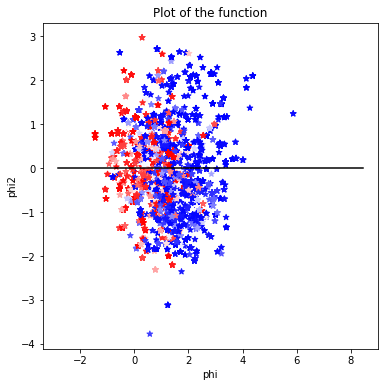

In [49]:
plt.figure(figsize=(6,6))
positives = np.array(list(df_all['seller_positive']))
plt.scatter(phi_transformed,phi2_transformed,marker='*',c = positives, cmap = 'bwr')


# Plotting
plt.plot(x_s_tran, y_s_tran, color = 'black')
plt.xlabel('phi')
plt.ylabel('phi2')
plt.title('Plot of the function')

plt.savefig("new_adj_phi_emo.png",transparent = True)



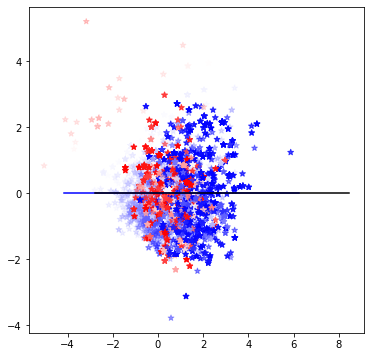

In [52]:
plt.figure(figsize=(6,6))
positives = np.array(df_all['comsumer_positive'])
plt.scatter(eta_transformed,eta2_transformed,marker='*',c = positives ,cmap = 'bwr', alpha = 0.05)


# Plotting
plt.plot(x_tran, y_tran, color = 'blue')
positives = np.array(list(df_all['seller_positive']))
plt.scatter(phi_transformed,phi2_transformed,marker='*',c = positives, cmap = 'bwr',alpha = 0.5)


# Plotting
plt.plot(x_s_tran, y_s_tran, color = 'black')
plt.savefig('mixed_emo.png',transparent = True)